<>:96: SyntaxWarning: invalid escape sequence '\A'
<>:96: SyntaxWarning: invalid escape sequence '\A'
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_2974/2332669451.py:96: SyntaxWarning: invalid escape sequence '\A'
  plt.title('BPT Diagram [OIII] 5007 ${\AA}$ / $H\\beta$ 4861 ${\AA}$ vs [NII] 6584 ${\AA}$ / $H\\alpha$ 6563 ${\AA}$', fontsize=14)


Text(0.5, 1.0, 'BPT Diagram [OIII] 5007 ${\\AA}$ / $H\\beta$ 4861 ${\\AA}$ vs [NII] 6584 ${\\AA}$ / $H\\alpha$ 6563 ${\\AA}$')

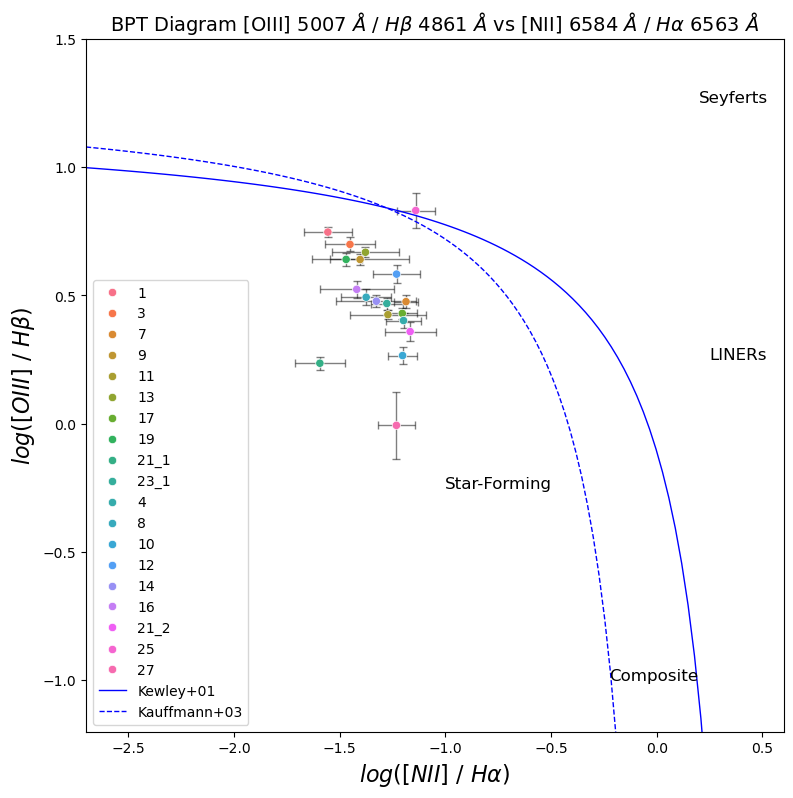

In [6]:
import pandas as pd
import numpy as np
from uncertainties import ufloat, unumpy
from uncertainties.umath import log10
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que ya tienes un DataFrame llamado df
# con las siguientes columnas:
# 'NII_6584_FLUX', 'NII_6584_FLUX_ERR', 'H_ALPHA_FLUX', 'H_ALPHA_FLUX_ERR'
# 'OIII_5007_FLUX', 'OIII_5007_FLUX_ERR', 'H_BETA_FLUX', 'H_BETA_FLUX_ERR'

df = pd.read_csv('measurement_emission_lines_oficial.tsv', delimiter='\t')
df = df.drop(index=[19,20,21,22,23])


# Crear columnas de ufloat
df['NII_6584_FLUX_UN'] = df.apply(lambda row: ufloat(row['NII_6584_FLUX'], row['NII_6584_FLUX_ERR']), axis=1)
df['H_ALPHA_FLUX_UN'] = df.apply(lambda row: ufloat(row['H_ALPHA_FLUX'], row['H_ALPHA_FLUX_ERR']), axis=1)
df['OIII_5007_FLUX_UN'] = df.apply(lambda row: ufloat(row['OIII_5007_FLUX'], row['OIII_5007_FLUX_ERR']), axis=1)
df['H_BETA_FLUX_UN'] = df.apply(lambda row: ufloat(row['H_BETA_FLUX'], row['H_BETA_FLUX_ERR']), axis=1)

# Calcular las razones con incertidumbres
nii_h_alpha_un = df['NII_6584_FLUX_UN'] / df['H_ALPHA_FLUX_UN']
o3_h_beta_un = df['OIII_5007_FLUX_UN'] / df['H_BETA_FLUX_UN']

# Calcular los logaritmos de las razones usando apply
log_nii_h_alpha_un = nii_h_alpha_un.apply(log10)
log_o3_h_beta_un = o3_h_beta_un.apply(log10)

# Separar los valores nominales y las incertidumbres
log_nii_h_alpha_nom = unumpy.nominal_values(log_nii_h_alpha_un)
log_nii_h_alpha_err = unumpy.std_devs(log_nii_h_alpha_un)
log_o3_h_beta_nom = unumpy.nominal_values(log_o3_h_beta_un)
log_o3_h_beta_err = unumpy.std_devs(log_o3_h_beta_un)



log_NII_Ha = np.linspace(-2.7, 0.3, 100)
log_NII_Ha_Kauffman = np.linspace(-2.7, 0., 100)

log_SII_Ha = np.linspace(-2, 0.3, 100)
log_SII_Ha_kewley = np.linspace(-0.32, 1.2, 100)

log_OI_Ha = np.linspace(-2.5, -0.7, 100)
log_OI_Ha_kewley06 = np.linspace(-1.13, 2.0, 100)

# Ecuaciones para las curvas de Kewley et al. (2001) y las separaciones de Seyfert y LINERs (Kewley 2006) y Kauffmann et al. (2003)
log_OIII_Hb_Kewley = 0.61 / (log_NII_Ha - 0.47) + 1.19 #Kewley+01
log_OIII_Hb_Kauffmann = 0.61 / (log_NII_Ha_Kauffman - 0.05) + 1.30 #Kauffman+03

log_OIII_Hb_SII_Kewley = 0.72 / (log_SII_Ha - 0.32) + 1.30 #Kewley
log_OIII_Hb_SII_Seyfert_LINER = (1.89 * log_SII_Ha_kewley) + 0.76 #Kewley2006

log_OIII_Hb_OI_Kewley = 0.73 / (log_OI_Ha + 0.59) + 1.33 #kewley
log_OIII_Hb_OI_Seyfert_LINER = (1.18 * log_OI_Ha_kewley06) + 1.30 #kewley+06

df_plot = pd.DataFrame({
    'log_NII_H_ALPHA': log_nii_h_alpha_nom,
    'log_OIII_H_BETA': log_o3_h_beta_nom,
    'log_NII_H_ALPHA_err': log_nii_h_alpha_err,
    'log_OIII_H_BETA_err': log_o3_h_beta_err,
    'ID': df['ID']
})

# Crear el gráfico de dispersión con seaborn
plt.figure(figsize=(9, 9))

# Añadir barras de error primero
plt.errorbar(df_plot['log_NII_H_ALPHA'], df_plot['log_OIII_H_BETA'], 
             xerr=df_plot['log_NII_H_ALPHA_err'], yerr=df_plot['log_OIII_H_BETA_err'], 
             fmt='none', ecolor='black', elinewidth=1, capsize=3, alpha=0.5, zorder=1)

# Añadir puntos con seaborn
sns.scatterplot(x='log_NII_H_ALPHA', y='log_OIII_H_BETA', hue='ID', data=df_plot, zorder=2)

# Crear el gráfico BPT con barras de error

#plt.figure(figsize=(8,8))
#plt.errorbar(log_nii_h_alpha_nom, log_o3_h_beta_nom, xerr=log_nii_h_alpha_err, yerr=log_o3_h_beta_err, fmt='none', ecolor='lightgray', elinewidth=2, capsize=0)
#sns.scatterplot(x=log_nii_h_alpha_nom, y=log_o3_h_beta_nom,hue=df['ID'])
plt.plot(log_NII_Ha,   log_OIII_Hb_Kewley, '-' , color='blue', lw=1, label='Kewley+01')
plt.plot(log_NII_Ha_Kauffman, log_OIII_Hb_Kauffmann, '--', color='blue', lw=1, label='Kauffmann+03')
plt.ylim(-1.2,1.5)
plt.xlim(-2.7,0.6)
#plt.axhline(y=np.log10(3), linestyle='--', color='cyan', lw=1)
#plt.axvline(x=np.log10(0.6), linestyle='--', color='cyan', lw=1)
plt.text(s='Star-Forming', x=-1.0, y=-0.25, fontsize=12)
plt.text(s='Composite', x=-0.225, y=-1.0, fontsize=12)
plt.text(s='Seyferts', x=0.2, y=1.25, fontsize=12)
plt.text(s='LINERs', x=0.25, y=0.25, fontsize=12)
#plt.errorbar(x=ratio_NII_Ha,y=ratio_OIII_Hb)
plt.xlabel('$log$($[NII]$ / $ H\\alpha$)', fontsize=16)
plt.ylabel('$log$($[OIII]$ / $ H\\beta$)', fontsize=16)
plt.legend(loc='lower left')
plt.title('BPT Diagram [OIII] 5007 ${\AA}$ / $H\\beta$ 4861 ${\AA}$ vs [NII] 6584 ${\AA}$ / $H\\alpha$ 6563 ${\AA}$', fontsize=14)



In [7]:
df_plot

,log_NII_H_ALPHA,log_OIII_H_BETA,log_NII_H_ALPHA_err,log_OIII_H_BETA_err,ID
0,-1.555764,0.746693,0.114934,0.020414,1
1,-1.451178,0.698740,0.119070,0.027711,3
2,-1.186067,0.475585,0.056614,0.025592,7
3,-1.403431,0.639845,0.229770,0.019908,9
4,-1.271665,0.425005,0.179068,0.016543,11
5,-1.378000,0.668084,0.159973,0.019539,13
6,-1.203707,0.429792,0.071031,0.020283,17
7,-1.469431,0.640266,0.074249,0.026697,19
8,-1.593629,0.235700,0.117560,0.024736,21_1
9,-1.276753,0.468371,0.076405,0.023395,23_1


<>:83: SyntaxWarning: invalid escape sequence '\A'
<>:83: SyntaxWarning: invalid escape sequence '\A'
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_2974/251579531.py:83: SyntaxWarning: invalid escape sequence '\A'
  plt.title('BPT Diagram [OIII] 5007 ${\AA}$ / $H\\beta$ 4861 ${\AA}$ vs [SII]$\\lambda$$\\lambda$ 6716,6731 ${\AA}$ / $H\\alpha$ 6563 ${\AA}$')


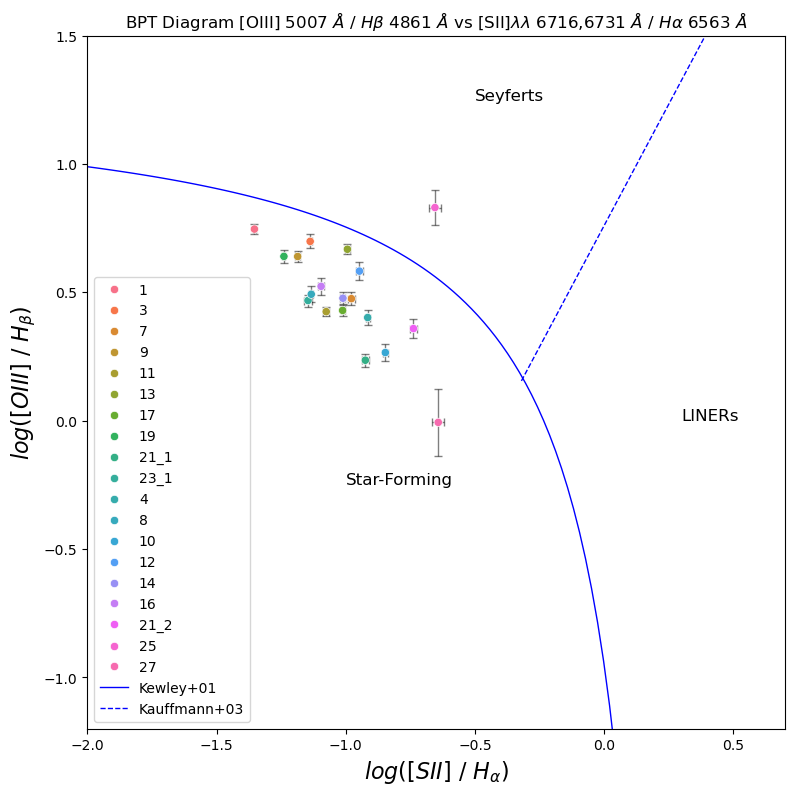

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from uncertainties import ufloat, unumpy
from uncertainties.umath import log10

df = pd.read_csv('measurement_emission_lines_oficial.tsv', delimiter='\t')
df = df.drop(index=[19,20,21,22,23])

log_NII_Ha = np.linspace(-2.5, 0.3, 100)
log_NII_Ha_Kauffman = np.linspace(-2.5, 0., 100)

log_SII_Ha = np.linspace(-2, 0.3, 100)
log_SII_Ha_kewley = np.linspace(-0.32, 1.2, 100)

log_OI_Ha = np.linspace(-2.5, -0.7, 100)
log_OI_Ha_kewley06 = np.linspace(-1.13, 2.0, 100)

# Ecuaciones para las curvas de Kewley et al. (2001) y las separaciones de Seyfert y LINERs (Kewley 2006) y Kauffmann et al. (2003)
log_OIII_Hb_Kewley = 0.61 / (log_NII_Ha - 0.47) + 1.19 #Kewley+01
log_OIII_Hb_Kauffmann = 0.61 / (log_NII_Ha_Kauffman - 0.05) + 1.30 #Kauffman+03

log_OIII_Hb_SII_Kewley = 0.72 / (log_SII_Ha - 0.32) + 1.30 #Kewley
log_OIII_Hb_SII_Seyfert_LINER = (1.89 * log_SII_Ha_kewley) + 0.76 #Kewley2006

log_OIII_Hb_OI_Kewley = 0.73 / (log_OI_Ha + 0.59) + 1.33 #kewley
log_OIII_Hb_OI_Seyfert_LINER = (1.18 * log_OI_Ha_kewley06) + 1.30 #kewley+06

# Crear columnas de ufloat
df['SII_6716_FLUX_UN'] = df.apply(lambda row: ufloat(row['SII_6716_FLUX'], row['SII_6716_FLUX_ERR']), axis=1)
df['SII_6731_FLUX_UN'] = df.apply(lambda row: ufloat(row['SII_6731_FLUX'], row['SII_6731_FLUX_ERR']), axis=1)
df['H_ALPHA_FLUX_UN'] = df.apply(lambda row: ufloat(row['H_ALPHA_FLUX'], row['H_ALPHA_FLUX_ERR']), axis=1)
df['OIII_5007_FLUX_UN'] = df.apply(lambda row: ufloat(row['OIII_5007_FLUX'], row['OIII_5007_FLUX_ERR']), axis=1)
df['H_BETA_FLUX_UN'] = df.apply(lambda row: ufloat(row['H_BETA_FLUX'], row['H_BETA_FLUX_ERR']), axis=1)

# Sumar las dos líneas de azufre
sii_sum_flux_un = df['SII_6716_FLUX_UN'] + df['SII_6731_FLUX_UN']

# Calcular las razones con incertidumbres
sii_ha_un = sii_sum_flux_un / df['H_ALPHA_FLUX_UN']
o3_hb_un = df['OIII_5007_FLUX_UN'] / df['H_BETA_FLUX_UN']

# Calcular los logaritmos de las razones usando apply
log_sii_ha_un = sii_ha_un.apply(log10)
log_o3_hb_un = o3_hb_un.apply(log10)

# Separar los valores nominales y las incertidumbres
log_sii_ha_nom = unumpy.nominal_values(log_sii_ha_un)
log_sii_ha_err = unumpy.std_devs(log_sii_ha_un)
log_o3_hb_nom = unumpy.nominal_values(log_o3_hb_un)
log_o3_hb_err = unumpy.std_devs(log_o3_hb_un)

# Crear DataFrame para seaborn
df_plot2 = pd.DataFrame({
    'log_SII_H_ALPHA': log_sii_ha_nom,
    'log_OIII_H_BETA': log_o3_hb_nom,
    'log_SII_H_ALPHA_err': log_sii_ha_err,
    'log_OIII_H_BETA_err': log_o3_hb_err,
    'ID': df['ID']
})

# Crear el gráfico de dispersión con seaborn
plt.figure(figsize=(9, 9))

# Añadir barras de error primero
plt.errorbar(df_plot2['log_SII_H_ALPHA'], df_plot2['log_OIII_H_BETA'], 
             xerr=df_plot2['log_SII_H_ALPHA_err'], yerr=df_plot2['log_OIII_H_BETA_err'], 
             fmt='none', ecolor='black', elinewidth=1, capsize=3, alpha=0.5, zorder=1)

# Añadir puntos con seaborn
sns.scatterplot(x='log_SII_H_ALPHA', y='log_OIII_H_BETA', hue='ID', data=df_plot2, zorder=2)
plt.plot(log_SII_Ha,   log_OIII_Hb_SII_Kewley, '-' , color='blue', lw=1, label='Kewley+01')
plt.plot(log_SII_Ha_kewley, log_OIII_Hb_SII_Seyfert_LINER, '--', color='blue', lw=1, label='Kauffmann+03')
plt.ylim(-1.2,1.5)
plt.xlim(-2,0.7)
plt.text(s='Star-Forming', x=-1.0, y=-0.25, fontsize=12)
plt.text(s='Seyferts', x=-0.5, y=1.25, fontsize=12)
plt.text(s='LINERs', x=0.3, y=0, fontsize=12)
#plt.errorbar(x=ratio_NII_Ha,y=ratio_OIII_Hb)
plt.xlabel('$log$($[SII]$ / $ H_{\\alpha}$)', fontsize=16)
plt.ylabel('$log$($[OIII]$ / $ H_{\\beta}$)', fontsize=16)
plt.title('BPT Diagram [OIII] 5007 ${\AA}$ / $H\\beta$ 4861 ${\AA}$ vs [SII]$\\lambda$$\\lambda$ 6716,6731 ${\AA}$ / $H\\alpha$ 6563 ${\AA}$')
plt.legend()

<>:80: SyntaxWarning: invalid escape sequence '\A'
<>:80: SyntaxWarning: invalid escape sequence '\A'
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_2099/526073436.py:80: SyntaxWarning: invalid escape sequence '\A'
  plt.title('BPT Diagram [OIII] 5007 ${\AA}$ / $H\\beta$ 4861 ${\AA}$ vs [OI] 6300 ${\AA}$ / $H\\alpha$ 6563 ${\AA}$')
/Users/belen/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: invalid value encountered in std_dev (vectorized)
  outputs = ufunc(*inputs)


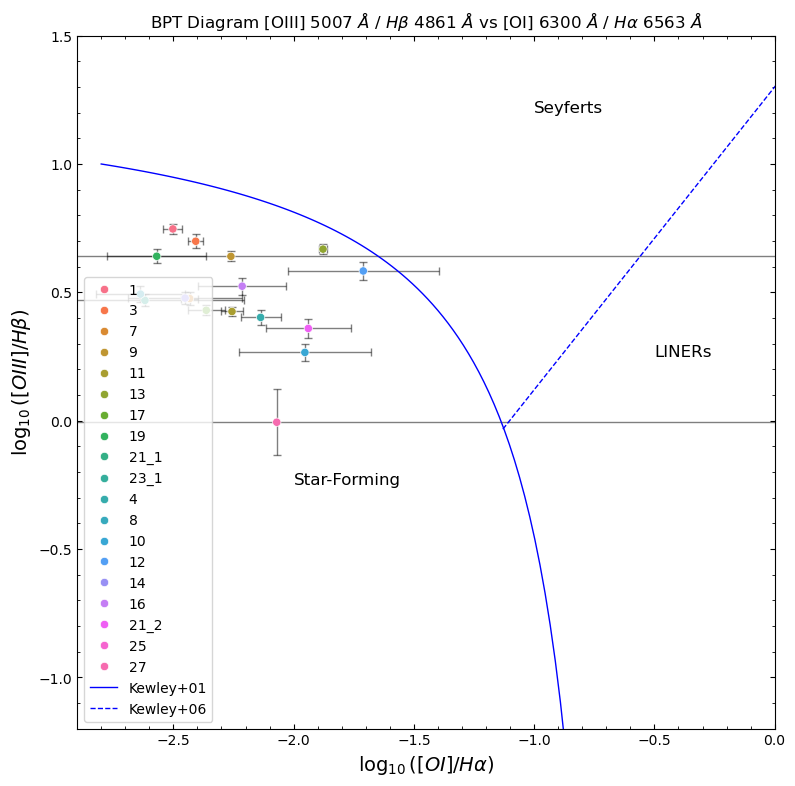

In [9]:
import pandas as pd
import numpy as np
from uncertainties import ufloat, unumpy
from uncertainties.umath import log10
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que ya tienes un DataFrame llamado df
# con las siguientes columnas:
# 'OI_6300_FLUX', 'OI_6300_FLUX_ERR', 'H_ALPHA_FLUX', 'H_ALPHA_FLUX_ERR'
# 'OIII_5007_FLUX', 'OIII_5007_FLUX_ERR', 'H_BETA_FLUX', 'H_BETA_FLUX_ERR'

df = pd.read_csv('measurement_emission_lines_oficial.tsv', delimiter='\t')
df = df.drop(index=[19, 20, 21, 22, 23])


# Crear columnas de ufloat
df['OI_6300_FLUX_UN'] = df.apply(lambda row: ufloat(row['OI_6300_FLUX'], row['OI_6300_FLUX_ERR']), axis=1)
df['H_ALPHA_FLUX_UN'] = df.apply(lambda row: ufloat(row['H_ALPHA_FLUX'], row['H_ALPHA_FLUX_ERR']), axis=1)
df['OIII_5007_FLUX_UN'] = df.apply(lambda row: ufloat(row['OIII_5007_FLUX'], row['OIII_5007_FLUX_ERR']), axis=1)
df['H_BETA_FLUX_UN'] = df.apply(lambda row: ufloat(row['H_BETA_FLUX'], row['H_BETA_FLUX_ERR']), axis=1)

# Calcular las razones con incertidumbres
oi_h_alpha_un = df['OI_6300_FLUX_UN'] / df['H_ALPHA_FLUX_UN']
o3_h_beta_un = df['OIII_5007_FLUX_UN'] / df['H_BETA_FLUX_UN']

# Calcular los logaritmos de las razones usando apply
log_oi_h_alpha_un = oi_h_alpha_un.apply(log10)
log_o3_h_beta_un = o3_h_beta_un.apply(log10)

# Separar los valores nominales y las incertidumbres
log_oi_h_alpha_nom = unumpy.nominal_values(log_oi_h_alpha_un)
log_oi_h_alpha_err = unumpy.std_devs(log_oi_h_alpha_un)
log_o3_h_beta_nom = unumpy.nominal_values(log_o3_h_beta_un)
log_o3_h_beta_err = unumpy.std_devs(log_o3_h_beta_un)

# Extender el rango de log_OI_Ha para cubrir tus datos
log_OI_Ha = np.linspace(-2.8, -0.7, 100)
log_OI_Ha_kewley06 = np.linspace(-1.13, 2.0, 100)

# Ecuaciones para las curvas de Kewley et al. (2001) y las separaciones de Seyfert y LINERs (Kewley 2006)
log_OIII_Hb_OI_Kewley = 0.73 / (log_OI_Ha + 0.59) + 1.33  # Kewley+01
log_OIII_Hb_OI_Seyfert_LINER = (1.18 * log_OI_Ha_kewley06) + 1.30  # Kewley+06

df_plot = pd.DataFrame({
    'log_OI_H_ALPHA': log_oi_h_alpha_nom,
    'log_OIII_H_BETA': log_o3_h_beta_nom,
    'log_OI_H_ALPHA_err': log_oi_h_alpha_err,
    'log_OIII_H_BETA_err': log_o3_h_beta_err,
    'ID': df['ID']
})

# Crear el gráfico de dispersión con seaborn
plt.figure(figsize=(9, 9))

# Añadir barras de error primero
plt.errorbar(df_plot['log_OI_H_ALPHA'], df_plot['log_OIII_H_BETA'], 
             xerr=df_plot['log_OI_H_ALPHA_err'], yerr=df_plot['log_OIII_H_BETA_err'], 
             fmt='none', ecolor='black', elinewidth=1, capsize=3, alpha=0.5, zorder=1)

# Añadir puntos con seaborn
sns.scatterplot(x='log_OI_H_ALPHA', y='log_OIII_H_BETA', hue='ID', data=df_plot, zorder=2)

# Añadir las curvas del BPT
plt.plot(log_OI_Ha, log_OIII_Hb_OI_Kewley, '-', color='blue', lw=1, label='Kewley+01')
plt.plot(log_OI_Ha_kewley06, log_OIII_Hb_OI_Seyfert_LINER, '--', color='blue', lw=1, label='Kewley+06')

plt.ylim(-1.2, 1.5)
plt.xlim(-2.9, 0.0)


# Añadir etiquetas y leyenda
plt.text(s='Star-Forming', x=-2.0, y=-0.25, fontsize=12)
plt.text(s='Seyferts', x=-1.0, y=1.20, fontsize=12)
plt.text(s='LINERs', x=-0.5, y=0.25, fontsize=12)

plt.xlabel('$\\log_{10}([OI]/H\\alpha)$', fontsize=14)
plt.ylabel('$\\log_{10}([OIII]/H\\beta)$', fontsize=14)
plt.legend(loc='lower left')
plt.title('BPT Diagram [OIII] 5007 ${\AA}$ / $H\\beta$ 4861 ${\AA}$ vs [OI] 6300 ${\AA}$ / $H\\alpha$ 6563 ${\AA}$')
# Configurar los ticks
plt.minorticks_on()
plt.tick_params(axis='both', which='both', direction='in', top=True, right=True)
plt.show()


<>:79: SyntaxWarning: invalid escape sequence '\ '
<>:80: SyntaxWarning: invalid escape sequence '\ '
<>:79: SyntaxWarning: invalid escape sequence '\ '
<>:80: SyntaxWarning: invalid escape sequence '\ '
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_2974/2773295514.py:79: SyntaxWarning: invalid escape sequence '\ '
  plt.xlabel('$log\ ([N II]\ 6584\ \AA / H\\alpha$)', fontsize=16)
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_2974/2773295514.py:80: SyntaxWarning: invalid escape sequence '\ '
  plt.ylabel('$log\ EW\ (H\\alpha\ [\AA])$', fontsize=16)


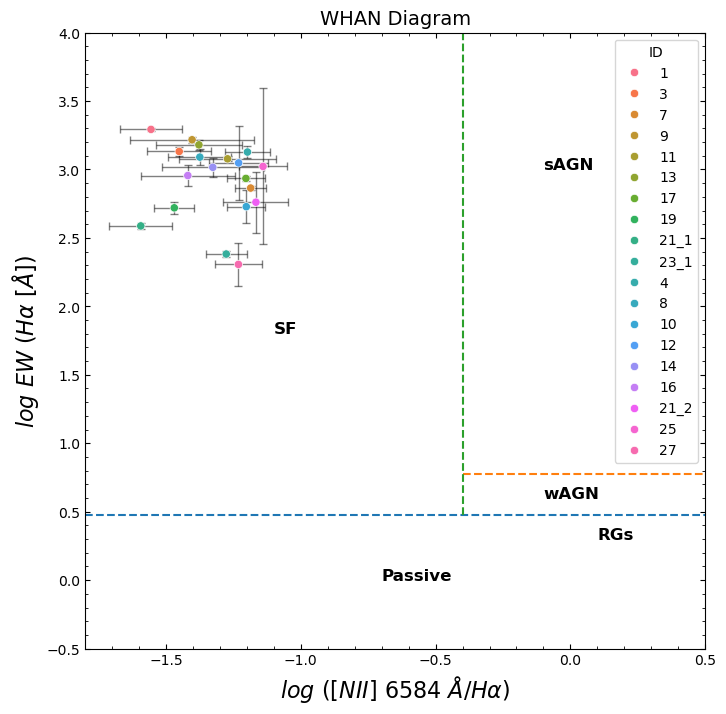

In [8]:
import pandas as pd
from uncertainties import ufloat, unumpy
from uncertainties.umath import log10
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Cargar datos desde el archivo .tsv
df = pd.read_csv('measurement_emission_lines_oficial.tsv', delimiter='\t')
df = df.drop(index=[19, 20, 21, 22, 23])

# Crear columnas de ufloat
df['NII_6584_FLUX_UN'] = df.apply(lambda row: ufloat(row['NII_6584_FLUX'], row['NII_6584_FLUX_ERR']), axis=1)
df['H_ALPHA_FLUX_UN'] = df.apply(lambda row: ufloat(row['H_ALPHA_FLUX'], row['H_ALPHA_FLUX_ERR']), axis=1)
df['H_ALPHA_EQW_UN'] = df.apply(lambda row: ufloat(row['H_ALPHA_EQW'], row['H_ALPHA_EQW_ERR']), axis=1)
df['NII_6584_EQW_UN'] = df.apply(lambda row: ufloat(row['NII_6584_EQW'], row['NII_6584_EQW_ERR']), axis=1)

# Calcular las razones con incertidumbres
nii_h_alpha_un = df['NII_6584_FLUX_UN'] / df['H_ALPHA_FLUX_UN']
h_alpha_eqw_un = df.apply(lambda row: ufloat(row['H_ALPHA_EQW'], row['H_ALPHA_EQW_ERR']), axis=1)

# Calcular los logaritmos de las razones
log_nii_h_alpha_un = unumpy.log10(nii_h_alpha_un)
log_h_alpha_eqw_un = unumpy.log10(h_alpha_eqw_un)

# Separar los valores nominales y las incertidumbres
log_nii_h_alpha_nom = unumpy.nominal_values(log_nii_h_alpha_un)
log_nii_h_alpha_err = unumpy.std_devs(log_nii_h_alpha_un)
log_h_alpha_eqw_nom = unumpy.nominal_values(log_h_alpha_eqw_un)
log_h_alpha_eqw_err = unumpy.std_devs(log_h_alpha_eqw_un)

# Crear DataFrame para el gráfico WHAN
df_plot = pd.DataFrame({
    'log_NII_H_ALPHA': log_nii_h_alpha_nom,
    'log_H_ALPHA_EQW': log_h_alpha_eqw_nom,
    'log_NII_H_ALPHA_err': log_nii_h_alpha_err,
    'log_H_ALPHA_EQW_err': log_h_alpha_eqw_err,
    'ID': df['ID']
})

# Crear el gráfico WHAN con seaborn
plt.figure(figsize=(8, 8))

# Añadir barras de error primero
plt.errorbar(df_plot['log_NII_H_ALPHA'], df_plot['log_H_ALPHA_EQW'],
             xerr=df_plot['log_NII_H_ALPHA_err'], yerr=df_plot['log_H_ALPHA_EQW_err'],
             fmt='none', ecolor='black', elinewidth=1, capsize=3, alpha=0.5, zorder=1)

# Añadir puntos con seaborn
sns.scatterplot(x='log_NII_H_ALPHA', y='log_H_ALPHA_EQW', hue='ID', data=df_plot, zorder=2)

# Líneas de separación según especificaciones

# Línea horizontal en log(EW(Hα)) = log(3)
x = np.linspace(-1.8, 0.5, 100)
y = np.log10(3) * np.ones_like(x)
plt.plot(x, y, '--')

# Línea horizontal en log(EW(Hα)) = log(6) desde x=-0.4 hacia la derecha
x = np.linspace(-0.4, 0.5, 100)
y = np.log10(6) * np.ones_like(x)
plt.plot(x, y, '--')

# Línea vertical en log([NII]/Hα) = -0.4 desde log(EW(Hα)) = log(3) hacia arriba
x = -0.4 * np.ones_like(y)
y = np.linspace(np.log10(3), 4, 100)
plt.plot(x, y, '--')

# Etiquetar las regiones del diagrama WHAN
plt.text(-1.1, 1.8, 'SF', weight='bold', fontsize=12)
plt.text(-0.1, 3, 'sAGN', weight='bold', fontsize=12)
plt.text(-0.1, 0.6, 'wAGN', weight='bold', fontsize=12)
plt.text(0.1, 0.3, 'RGs', weight='bold', fontsize=12)
plt.text(-0.7, 0, 'Passive', weight='bold', fontsize=12)

# Configurar etiquetas y leyenda
plt.xlim(-1.8, 0.5)
plt.ylim(-0.5, 4)
plt.xlabel('$log\ ([N II]\ 6584\ \AA / H\\alpha$)', fontsize=16)
plt.ylabel('$log\ EW\ (H\\alpha\ [\AA])$', fontsize=16)
plt.title('WHAN Diagram', fontsize=14)
plt.legend(title='ID')

# Configurar los ticks
plt.minorticks_on()
plt.tick_params(axis='both', which='both', direction='in', top=True, right=True)

# Añadir las líneas de los ticks internos

plt.show()


<>:114: SyntaxWarning: invalid escape sequence '\l'
<>:115: SyntaxWarning: invalid escape sequence '\l'
<>:114: SyntaxWarning: invalid escape sequence '\l'
<>:115: SyntaxWarning: invalid escape sequence '\l'
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_730/711129483.py:114: SyntaxWarning: invalid escape sequence '\l'
  plt.xlabel('$log$($[NII]$ $\lambda$6584 $\AA$ / $H\\alpha$)', fontsize=20)
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_730/711129483.py:115: SyntaxWarning: invalid escape sequence '\l'
  plt.ylabel('$log$($[OIII]$ $\lambda$5007 $\AA$ / $H\\beta$)', fontsize=20)


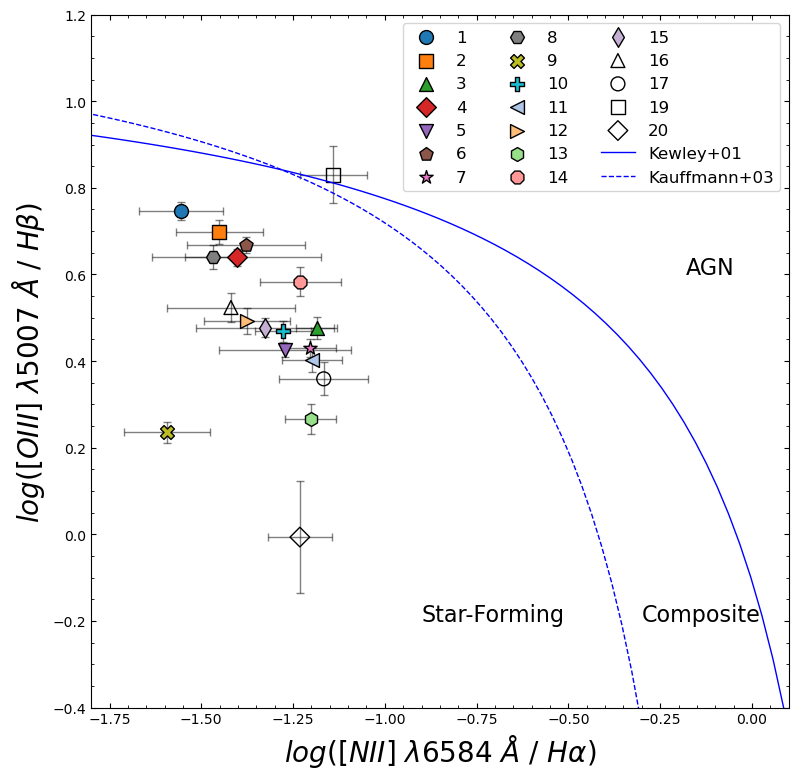

In [9]:
import pandas as pd
import numpy as np
from uncertainties import ufloat, unumpy
from uncertainties.umath import log10
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('measurement_emission_lines_oficial_newnumber.tsv', delimiter='\t')
df = df.drop(index=[19,20,21,22,23])

# Crear columnas de ufloat
df['NII_6584_FLUX_UN'] = df.apply(lambda row: ufloat(row['NII_6584_FLUX'], row['NII_6584_FLUX_ERR']), axis=1)
df['H_ALPHA_FLUX_UN'] = df.apply(lambda row: ufloat(row['H_ALPHA_FLUX'], row['H_ALPHA_FLUX_ERR']), axis=1)
df['OIII_5007_FLUX_UN'] = df.apply(lambda row: ufloat(row['OIII_5007_FLUX'], row['OIII_5007_FLUX_ERR']), axis=1)
df['H_BETA_FLUX_UN'] = df.apply(lambda row: ufloat(row['H_BETA_FLUX'], row['H_BETA_FLUX_ERR']), axis=1)

# Calcular las razones con incertidumbres
nii_h_alpha_un = df['NII_6584_FLUX_UN'] / df['H_ALPHA_FLUX_UN']
o3_h_beta_un = df['OIII_5007_FLUX_UN'] / df['H_BETA_FLUX_UN']

# Calcular los logaritmos de las razones usando apply
log_nii_h_alpha_un = nii_h_alpha_un.apply(log10)
log_o3_h_beta_un = o3_h_beta_un.apply(log10)

# Separar los valores nominales y las incertidumbres
log_nii_h_alpha_nom = unumpy.nominal_values(log_nii_h_alpha_un)
log_nii_h_alpha_err = unumpy.std_devs(log_nii_h_alpha_un)
log_o3_h_beta_nom = unumpy.nominal_values(log_o3_h_beta_un)
log_o3_h_beta_err = unumpy.std_devs(log_o3_h_beta_un)


log_NII_Ha = np.linspace(-2.7, 0.3, 100)
log_NII_Ha_Kauffman = np.linspace(-2.7, 0., 100)



# Ecuaciones para las curvas de Kewley et al. (2001) y las separaciones de Seyfert y LINERs (Kewley 2006) y Kauffmann et al. (2003)
log_OIII_Hb_Kewley = 0.61 / (log_NII_Ha - 0.47) + 1.19 #Kewley+01
log_OIII_Hb_Kauffmann = 0.61 / (log_NII_Ha_Kauffman - 0.05) + 1.30 #Kauffman+03


df_plot = pd.DataFrame({
    'log_NII_H_ALPHA': log_nii_h_alpha_nom,
    'log_OIII_H_BETA': log_o3_h_beta_nom,
    'log_NII_H_ALPHA_err': log_nii_h_alpha_err,
    'log_OIII_H_BETA_err': log_o3_h_beta_err,
    'ID': df['ID']
})


# Crear el gráfico
plt.figure(figsize=(9, 9))  # Tamaño ajustado para espacio extra

# Añadir barras de error
plt.errorbar(df_plot['log_NII_H_ALPHA'], df_plot['log_OIII_H_BETA'],
             xerr=df_plot['log_NII_H_ALPHA_err'], yerr=df_plot['log_OIII_H_BETA_err'],
             fmt='none', ecolor='black', elinewidth=1, capsize=3, alpha=0.5, zorder=1)

# Configuración explícita de colores para cada punto
explicit_colors = [
    '#1f77b4',  # Azul
    '#ff7f0e',  # Naranja
    '#2ca02c',  # Verde
    '#d62728',  # Rojo
    '#9467bd',  # Morado
    '#8c564b',  # Marrón
    '#e377c2',  # Rosa
    '#7f7f7f',  # Gris
    '#bcbd22',  # Amarillo verdoso
    '#17becf',  # Turquesa
    '#aec7e8',  # Azul claro
    '#ffbb78',  # Naranja claro
    '#98df8a',  # Verde claro
    '#ff9896',  # Rojo claro
    '#c5b0d5',  # Morado claro
    '#f7b6d2',  # Rosa claro
    '#00d8d8',  # Turquesa fuerte (personalizado para índice 16)
    '#c49c94',  # Marrón claro
    '#fdae6b',  # Naranja pastel
]

# Configuración de marcadores
explicit_markers = ['o', 's', '^', 'D', 'v', 'p', '*', 'H', 'X', 'P', '<', '>', 'h', '8', 'd', '1', '2', '3', '4']


# Graficar puntos con colores y marcadores explícitos
for idx, row in df_plot.iterrows():
    color = explicit_colors[idx % len(explicit_colors)]
    if idx >= 15:  # Últimos 4 puntos con marcadores distintos
        marker = ['^', 'o', 's', 'D'][idx - 15]
        facecolor = 'none' if marker in ['^', 'o', 's', 'D'] else color  # Sin relleno si "o" o "s"
    else:
        marker = explicit_markers[idx % len(explicit_markers)]
        facecolor = color

    plt.scatter(row['log_NII_H_ALPHA'], row['log_OIII_H_BETA'],
                color=facecolor, marker=marker,
                label=row['ID'] if idx < 19 else "", s=100, edgecolor='black', zorder=2)





plt.plot(log_NII_Ha, log_OIII_Hb_Kewley, '-', color='blue', lw=1, label='Kewley+01')
plt.plot(log_NII_Ha_Kauffman, log_OIII_Hb_Kauffmann, '--', color='blue', lw=1, label='Kauffmann+03')
plt.text(s='Star-Forming', x=-0.9, y=-0.2, fontsize=16)
plt.text(s='Composite', x=-0.3, y=-0.2, fontsize=16)
#plt.text(s='Seyferts', x=0.2, y=1.25, fontsize=12)
plt.text(s='AGN', x=-0.18, y=0.6, fontsize=16)

# Configuración del gráfico
plt.ylim(-0.4, 1.2)
plt.xlim(-1.8, 0.1)
plt.xlabel('$log$($[NII]$ $\lambda$6584 $\AA$ / $H\\alpha$)', fontsize=20)
plt.ylabel('$log$($[OIII]$ $\lambda$5007 $\AA$ / $H\\beta$)', fontsize=20)
#plt.title('BPT Diagram', fontsize=14)

# Ajustar la posición de la leyenda
#plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), fontsize=10, ncol=1)
plt.legend(loc='upper right', fontsize=12, ncol=3)
#plt.tight_layout()
# Configurar los ticks
plt.minorticks_on()
plt.tick_params(axis='both', which='both', direction='in', top=True, right=True)

plt.show()


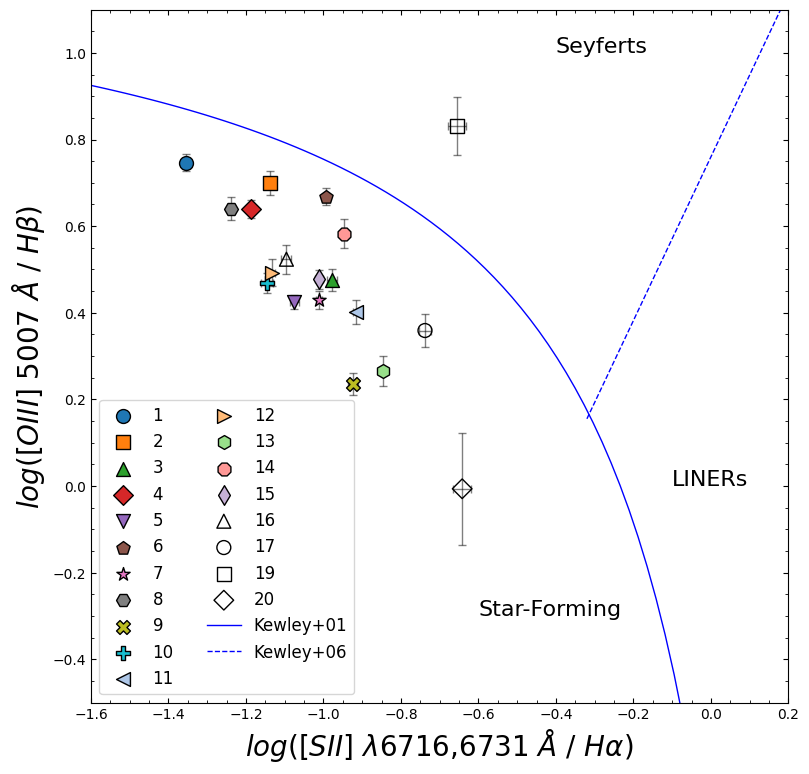

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from uncertainties import ufloat, unumpy
from uncertainties.umath import log10

df = pd.read_csv('measurement_emission_lines_oficial_newnumber.tsv', delimiter='\t')
df = df.drop(index=[19,20,21,22,23])

log_SII_Ha = np.linspace(-2, 0.3, 100)
log_SII_Ha_kewley = np.linspace(-0.32, 1.2, 100)

log_OIII_Hb_SII_Kewley = 0.72 / (log_SII_Ha - 0.32) + 1.30 #Kewley
log_OIII_Hb_SII_Seyfert_LINER = (1.89 * log_SII_Ha_kewley) + 0.76 #Kewley2006

# Crear columnas de ufloat
df['SII_6716_FLUX_UN'] = df.apply(lambda row: ufloat(row['SII_6716_FLUX'], row['SII_6716_FLUX_ERR']), axis=1)
df['SII_6731_FLUX_UN'] = df.apply(lambda row: ufloat(row['SII_6731_FLUX'], row['SII_6731_FLUX_ERR']), axis=1)
df['H_ALPHA_FLUX_UN'] = df.apply(lambda row: ufloat(row['H_ALPHA_FLUX'], row['H_ALPHA_FLUX_ERR']), axis=1)
df['OIII_5007_FLUX_UN'] = df.apply(lambda row: ufloat(row['OIII_5007_FLUX'], row['OIII_5007_FLUX_ERR']), axis=1)
df['H_BETA_FLUX_UN'] = df.apply(lambda row: ufloat(row['H_BETA_FLUX'], row['H_BETA_FLUX_ERR']), axis=1)

# Sumar las dos líneas de azufre
sii_sum_flux_un = df['SII_6716_FLUX_UN'] + df['SII_6731_FLUX_UN']

# Calcular las razones con incertidumbres
sii_ha_un = sii_sum_flux_un / df['H_ALPHA_FLUX_UN']
o3_hb_un = df['OIII_5007_FLUX_UN'] / df['H_BETA_FLUX_UN']

# Calcular los logaritmos de las razones usando apply
log_sii_ha_un = sii_ha_un.apply(log10)
log_o3_hb_un = o3_hb_un.apply(log10)

# Separar los valores nominales y las incertidumbres
log_sii_ha_nom = unumpy.nominal_values(log_sii_ha_un)
log_sii_ha_err = unumpy.std_devs(log_sii_ha_un)
log_o3_hb_nom = unumpy.nominal_values(log_o3_hb_un)
log_o3_hb_err = unumpy.std_devs(log_o3_hb_un)

# Crear DataFrame para seaborn
df_plot2 = pd.DataFrame({
    'log_SII_H_ALPHA': log_sii_ha_nom,
    'log_OIII_H_BETA': log_o3_hb_nom,
    'log_SII_H_ALPHA_err': log_sii_ha_err,
    'log_OIII_H_BETA_err': log_o3_hb_err,
    'ID': df['ID']
})

# Crear el gráfico
plt.figure(figsize=(9, 9))  # Tamaño ajustado para espacio extra

# Añadir barras de error primero
plt.errorbar(df_plot2['log_SII_H_ALPHA'], df_plot2['log_OIII_H_BETA'], 
             xerr=df_plot2['log_SII_H_ALPHA_err'], yerr=df_plot2['log_OIII_H_BETA_err'], 
             fmt='none', ecolor='black', elinewidth=1, capsize=3, alpha=0.5, zorder=1)

# Configuración explícita de colores para cada punto
explicit_colors = [
    '#1f77b4',  # Azul
    '#ff7f0e',  # Naranja
    '#2ca02c',  # Verde
    '#d62728',  # Rojo
    '#9467bd',  # Morado
    '#8c564b',  # Marrón
    '#e377c2',  # Rosa
    '#7f7f7f',  # Gris
    '#bcbd22',  # Amarillo verdoso
    '#17becf',  # Turquesa
    '#aec7e8',  # Azul claro
    '#ffbb78',  # Naranja claro
    '#98df8a',  # Verde claro
    '#ff9896',  # Rojo claro
    '#c5b0d5',  # Morado claro
    '#f7b6d2',  # Rosa claro
    '#00d8d8',  # Turquesa fuerte (personalizado para índice 16)
    '#c49c94',  # Marrón claro
    '#fdae6b',  # Naranja pastel
]

# Configuración de marcadores
explicit_markers = ['o', 's', '^', 'D', 'v', 'p', '*', 'H', 'X', 'P', '<', '>', 'h', '8', 'd', '1', '2', '3', '4']


# Graficar puntos con colores y marcadores explícitos
for idx, row in df_plot2.iterrows():
    color = explicit_colors[idx % len(explicit_colors)]
    if idx >= 15:  # Últimos 4 puntos con marcadores distintos
        marker = ['^', 'o', 's', 'D'][idx - 15]
        facecolor = 'none' if marker in ['^', 'o', 's', 'D'] else color  # Sin relleno si "o" o "s"
    else:
        marker = explicit_markers[idx % len(explicit_markers)]
        facecolor = color

    plt.scatter(row['log_SII_H_ALPHA'], row['log_OIII_H_BETA'],
                color=facecolor, marker=marker,
                label=row['ID'] if idx < 19 else "", s=100, edgecolor='black', zorder=2)



plt.plot(log_SII_Ha,   log_OIII_Hb_SII_Kewley, '-' , color='blue', lw=1, label='Kewley+01')
plt.plot(log_SII_Ha_kewley, log_OIII_Hb_SII_Seyfert_LINER, '--', color='blue', lw=1, label='Kewley+06')

plt.ylim(-0.5,1.1)
plt.xlim(-1.6,0.2)

plt.text(s='Star-Forming', x=-0.6, y=-0.3, fontsize=16)
plt.text(s='Seyferts', x=-0.4, y=1.0, fontsize=16)
plt.text(s='LINERs', x=-0.1, y=0, fontsize=16)


plt.xlabel('$log$($[SII]$ $\lambda$6716,6731 $\AA$ / $H\\alpha$)', fontsize=20)
plt.ylabel('$log$($[OIII]$ 5007 $\AA$ / $H\\beta$)', fontsize=20)
#plt.title('BPT Diagram', fontsize=14)

# Ajustar la posición de la leyenda
#plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), fontsize=10, ncol=1)
plt.legend(loc='lower left', fontsize=12, ncol=2)
#plt.tight_layout()
# Configurar los ticks
plt.minorticks_on()
plt.tick_params(axis='both', which='both', direction='in', top=True, right=True)

plt.show()


<>:118: SyntaxWarning: invalid escape sequence '\ '
<>:119: SyntaxWarning: invalid escape sequence '\ '
<>:118: SyntaxWarning: invalid escape sequence '\ '
<>:119: SyntaxWarning: invalid escape sequence '\ '
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_730/516620805.py:118: SyntaxWarning: invalid escape sequence '\ '
  plt.xlabel('$log\ ([N II]\ 6584\ \AA / H\\alpha$)', fontsize=16)
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_730/516620805.py:119: SyntaxWarning: invalid escape sequence '\ '
  plt.ylabel('$log\ EW\ (H\\alpha\ [\AA])$', fontsize=16)


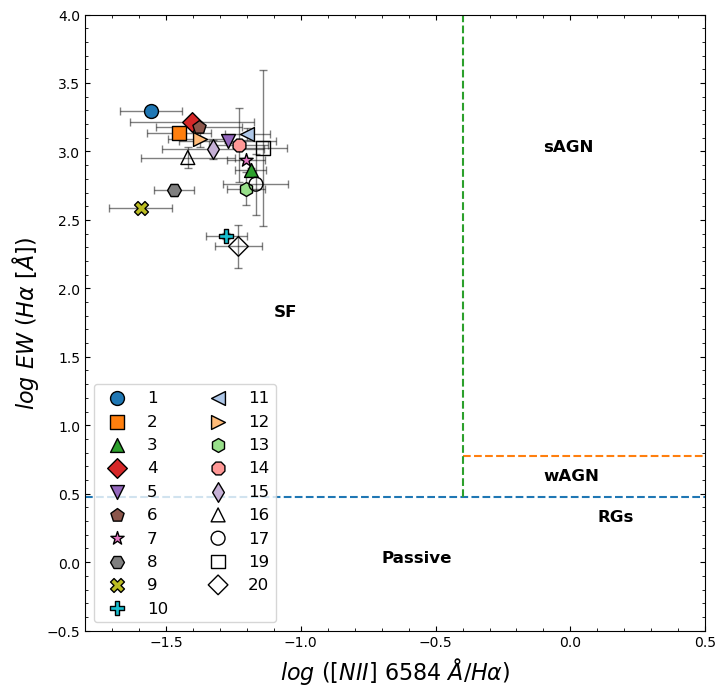

In [6]:
import pandas as pd
from uncertainties import ufloat, unumpy
from uncertainties.umath import log10
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Cargar datos desde el archivo .tsv
df = pd.read_csv('measurement_emission_lines_oficial_newnumber.tsv', delimiter='\t')
df = df.drop(index=[19, 20, 21, 22, 23])

# Crear columnas de ufloat
df['NII_6584_FLUX_UN'] = df.apply(lambda row: ufloat(row['NII_6584_FLUX'], row['NII_6584_FLUX_ERR']), axis=1)
df['H_ALPHA_FLUX_UN'] = df.apply(lambda row: ufloat(row['H_ALPHA_FLUX'], row['H_ALPHA_FLUX_ERR']), axis=1)
df['H_ALPHA_EQW_UN'] = df.apply(lambda row: ufloat(row['H_ALPHA_EQW'], row['H_ALPHA_EQW_ERR']), axis=1)
df['NII_6584_EQW_UN'] = df.apply(lambda row: ufloat(row['NII_6584_EQW'], row['NII_6584_EQW_ERR']), axis=1)

# Calcular las razones con incertidumbres
nii_h_alpha_un = df['NII_6584_FLUX_UN'] / df['H_ALPHA_FLUX_UN']
h_alpha_eqw_un = df.apply(lambda row: ufloat(row['H_ALPHA_EQW'], row['H_ALPHA_EQW_ERR']), axis=1)

# Calcular los logaritmos de las razones
log_nii_h_alpha_un = unumpy.log10(nii_h_alpha_un)
log_h_alpha_eqw_un = unumpy.log10(h_alpha_eqw_un)

# Separar los valores nominales y las incertidumbres
log_nii_h_alpha_nom = unumpy.nominal_values(log_nii_h_alpha_un)
log_nii_h_alpha_err = unumpy.std_devs(log_nii_h_alpha_un)
log_h_alpha_eqw_nom = unumpy.nominal_values(log_h_alpha_eqw_un)
log_h_alpha_eqw_err = unumpy.std_devs(log_h_alpha_eqw_un)

# Crear DataFrame para el gráfico WHAN
df_plot3 = pd.DataFrame({
    'log_NII_H_ALPHA': log_nii_h_alpha_nom,
    'log_H_ALPHA_EQW': log_h_alpha_eqw_nom,
    'log_NII_H_ALPHA_err': log_nii_h_alpha_err,
    'log_H_ALPHA_EQW_err': log_h_alpha_eqw_err,
    'ID': df['ID']
})

# Crear el gráfico WHAN con seaborn
plt.figure(figsize=(8, 8))

# Añadir barras de error primero
plt.errorbar(df_plot3['log_NII_H_ALPHA'], df_plot3['log_H_ALPHA_EQW'],
             xerr=df_plot3['log_NII_H_ALPHA_err'], yerr=df_plot3['log_H_ALPHA_EQW_err'],
             fmt='none', ecolor='black', elinewidth=1, capsize=3, alpha=0.5, zorder=1)

# Configuración explícita de colores para cada punto
explicit_colors = [
    '#1f77b4',  # Azul
    '#ff7f0e',  # Naranja
    '#2ca02c',  # Verde
    '#d62728',  # Rojo
    '#9467bd',  # Morado
    '#8c564b',  # Marrón
    '#e377c2',  # Rosa
    '#7f7f7f',  # Gris
    '#bcbd22',  # Amarillo verdoso
    '#17becf',  # Turquesa
    '#aec7e8',  # Azul claro
    '#ffbb78',  # Naranja claro
    '#98df8a',  # Verde claro
    '#ff9896',  # Rojo claro
    '#c5b0d5',  # Morado claro
    '#f7b6d2',  # Rosa claro
    '#00d8d8',  # Turquesa fuerte (personalizado para índice 16)
    '#c49c94',  # Marrón claro
    '#fdae6b',  # Naranja pastel
]

# Configuración de marcadores
explicit_markers = ['o', 's', '^', 'D', 'v', 'p', '*', 'H', 'X', 'P', '<', '>', 'h', '8', 'd', '1', '2', '3', '4']

# Graficar puntos con colores y marcadores explícitos
for idx, row in df_plot3.iterrows():
    color = explicit_colors[idx % len(explicit_colors)]
    if idx >= 15:  # Últimos 4 puntos con marcadores distintos
        marker = ['^', 'o', 's', 'D'][idx - 15]
        facecolor = 'none' if marker in ['^', 'o', 's', 'D'] else color  # Sin relleno si "o" o "s"
    else:
        marker = explicit_markers[idx % len(explicit_markers)]
        facecolor = color

    plt.scatter(row['log_NII_H_ALPHA'], row['log_H_ALPHA_EQW'],
                color=facecolor, marker=marker,
                label=row['ID'] if idx < 19 else "", s=100, edgecolor='black', zorder=2)



# Líneas de separación según especificaciones

# Línea horizontal en log(EW(Hα)) = log(3)
x = np.linspace(-1.8, 0.5, 100)
y = np.log10(3) * np.ones_like(x)
plt.plot(x, y, '--')

# Línea horizontal en log(EW(Hα)) = log(6) desde x=-0.4 hacia la derecha
x = np.linspace(-0.4, 0.5, 100)
y = np.log10(6) * np.ones_like(x)
plt.plot(x, y, '--')

# Línea vertical en log([NII]/Hα) = -0.4 desde log(EW(Hα)) = log(3) hacia arriba
x = -0.4 * np.ones_like(y)
y = np.linspace(np.log10(3), 4, 100)
plt.plot(x, y, '--')

# Etiquetar las regiones del diagrama WHAN
plt.text(-1.1, 1.8, 'SF', weight='bold', fontsize=12)
plt.text(-0.1, 3, 'sAGN', weight='bold', fontsize=12)
plt.text(-0.1, 0.6, 'wAGN', weight='bold', fontsize=12)
plt.text(0.1, 0.3, 'RGs', weight='bold', fontsize=12)
plt.text(-0.7, 0, 'Passive', weight='bold', fontsize=12)

# Configurar etiquetas y leyenda
plt.xlim(-1.8, 0.5)
plt.ylim(-0.5, 4)
plt.xlabel('$log\ ([N II]\ 6584\ \AA / H\\alpha$)', fontsize=16)
plt.ylabel('$log\ EW\ (H\\alpha\ [\AA])$', fontsize=16)
#plt.title('WHAN Diagram', fontsize=14)
plt.legend(loc='lower left', fontsize=12, ncol=2)

# Configurar los ticks
plt.minorticks_on()
plt.tick_params(axis='both', which='both', direction='in', top=True, right=True)

# Añadir las líneas de los ticks internos

plt.show()
